<a href="https://colab.research.google.com/github/samuramirez/cellmigration/blob/master/segmentation_1_class_nuc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Segmentation one class (nucleus)

##Mount Google Drive, authenticate SDK, install load packages

### Mount Google Drive (Colab can see Drive files) and authenticate so that we can interact with GCP via SDK

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import auth
#This allows SDK to see and edit Google Drive files
#SDK is required to interact with GCP
auth.authenticate_user()

### Installing and loading packages 

In [ ]:
#!nvidia-smi

In [ ]:
import pandas as pd
#pip install --upgrade pandas

In [ ]:
pd.__version__

'1.1.5'

In [ ]:
pip install torch==1.7.1 torchvision==0.8.2

     |████████████████████████████████| 776.8MB 24kB/s 
     |████████████████████████████████| 12.8MB 39.9MB/s 
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.7.1 which is incompatible.
  Found existing installation: torch 1.8.1+cu101
    Uninstalling torch-1.8.1+cu101:
      Successfully uninstalled torch-1.8.1+cu101
  Found existing installation: torchvision 0.9.1+cu101
    Uninstalling torchvision-0.9.1+cu101:
      Successfully uninstalled torchvision-0.9.1+cu101


In [ ]:
import torch
print(torch.__version__)


1.7.1


In [ ]:
print(torch.version.cuda)

10.2


In [ ]:
torch.cuda.is_available()

True

In [ ]:
#torch.cuda.get_device_name(0)

In [ ]:
#!pip install -q torch==1.7.0 torchvision

In [ ]:
#!pip install fastai==2.0.13 --no-deps


In [ ]:
#!pip install fastcore==1.0.13
!pip install fastcore

     |████████████████████████████████| 61kB 5.1MB/s 


In [ ]:
import fastcore


In [ ]:
#!pip install -Uqq fastbook

In [ ]:
!pip install fastai --upgrade

     |████████████████████████████████| 204kB 9.3MB/s 
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [ ]:
import fastai
fastai.__version__

'2.3.1'

In [ ]:
#import fastbook
#fastbook.setup_book()

In [ ]:
print(fastcore.__version__)


1.3.20


In [ ]:
from fastai.vision.all import *

In [ ]:
import imageio
from skimage.io import imread, imsave, imshow
from skimage.exposure import rescale_intensity
import os
import numpy as np
from pathlib import Path
import re
import ntpath


# Preparing data to train only on nucleus (from combined nuc-memb masks)

###Load masks for training

In [ ]:
training_masks_path='cellmbucket/training_datasets/110619_bleb_nuc_memb_masks' #@param
maskdir='training_masks/' #@param
#@markdown local folder is "content" when working in colab, may be different for GCP AI
local_folder='content' #@param


In [ ]:
!mkdir {maskdir} 

In [ ]:
!gsutil -m cp -r gs://{training_masks_path} /{local_folder}

Copying gs://cellmbucket/training_datasets/110619_bleb_nuc_memb_masks/110619_Sample1_s12_t1.tif...
Copying gs://cellmbucket/training_datasets/110619_bleb_nuc_memb_masks/110619_Sample1_s11_t1.tif...
Copying gs://cellmbucket/training_datasets/110619_bleb_nuc_memb_masks/110619_Sample1_s12_t101.tif...
Copying gs://cellmbucket/training_datasets/110619_bleb_nuc_memb_masks/110619_Sample1_s11_t101.tif...
Copying gs://cellmbucket/training_datasets/110619_bleb_nuc_memb_masks/110619_Sample1_s12_t26.tif...
Copying gs://cellmbucket/training_datasets/110619_bleb_nuc_memb_masks/110619_Sample1_s11_t51.tif...
Copying gs://cellmbucket/training_datasets/110619_bleb_nuc_memb_masks/110619_Sample1_s12_t51.tif...
Copying gs://cellmbucket/training_datasets/110619_bleb_nuc_memb_masks/110619_Sample1_s11_t26.tif...
Copying gs://cellmbucket/training_datasets/110619_bleb_nuc_memb_masks/110619_Sample1_s11_t76.tif...
Copying gs://cellmbucket/training_datasets/110619_bleb_nuc_memb_masks/110619_Sample1_s12_t76.tif...


In [ ]:
training_masks_folder = ntpath.basename(training_masks_path)

In [ ]:
#get names of all masks
imagenames=os.listdir(training_masks_folder)

In [ ]:
imagenames[0]

'110619_Sample1_s16_t26.tif'

In [ ]:
mask=imread(training_masks_folder+'/'+imagenames[0])

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


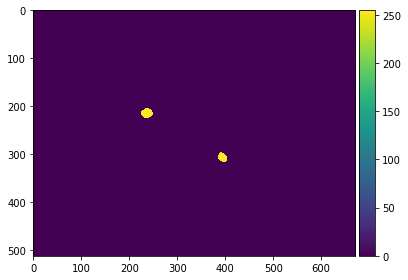

In [ ]:
imshow(mask[:,:,1])

In [ ]:
len(imagenames)

42

In [ ]:
#PREPARE MASKS AND AT THE END SAVE IN A DIFFERENT FOLDER
#DONE THIS WAY IN CASE WE ARE USING MASKS COMING FROM DIFFERENT TRAINING SET FOLDERS

#get only cells from combined (nuc,memb) mask
for imagename in imagenames:
  mask=imread(training_masks_folder+'/'+imagename)
  mask=mask[:,:,1]
  imsave(training_masks_folder+'/'+imagename, mask)

#rename files
for imagename in imagenames:
  os.rename(training_masks_folder+'/'+imagename,training_masks_folder+'/'+imagename[:-4]+'.TIF')

#get names of all masks
imagenames=os.listdir(training_masks_folder)

#copy individual images to maskdir
!cp {training_masks_folder}/* {maskdir}

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: 110619_bleb_nuc_memb_masks/110619_Sample1_s16_t26.tif is a low contrast image
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: 110619_bleb_nuc_memb_masks/110619_Sample1_s12_t26.tif is a low contrast image
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: 110619_bleb_nuc_memb_masks/110619_Sample1_s11_t101.tif is a low contrast image
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: 110619_bleb_nuc_memb_masks/110619_Sample1_s13_t76.tif is a low contrast image
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: 110619_bleb_nuc_memb_masks/110619_Sample1_s15_t51.tif is a low contrast image
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: 110619_bleb_nuc_memb_masks/110619_Sample1_s16_t51.tif is a low contrast image
  
/usr/local/lib/python3.7/dist-packages/ipykernel_la

In [ ]:
imagenames[0]

'110619_Sample1_s18_t76.TIF'

In [ ]:
#get names of all masks
imagenames=os.listdir(maskdir)

In [ ]:
#convert masks into files with only 0s and 5s in maskdir
for imagename in imagenames:
  mask=imread(maskdir+imagename)
  mask[mask>0]=5
  imsave(maskdir+imagename, mask)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: training_masks/110619_Sample1_s18_t76.TIF is a low contrast image
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: training_masks/110619_Sample1_s14_t76.TIF is a low contrast image
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: training_masks/110619_Sample1_s11_t101.TIF is a low contrast image
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: training_masks/110619_Sample1_s13_t26.TIF is a low contrast image
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: training_masks/110619_Sample1_s15_t101.TIF is a low contrast image
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: training_masks/110619_Sample1_s17_t26.TIF is a low contrast image
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: training_masks/110619_Sampl

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


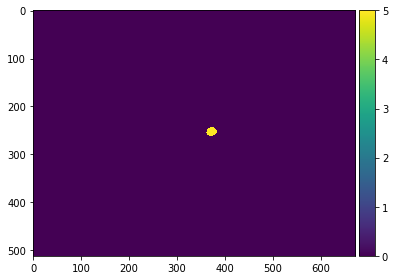

In [ ]:
mask=imread(maskdir+'/'+imagenames[1])
#hist=plt.hist(mask.ravel())
imshow(mask)

###Get and prepare images for training

In [ ]:
!gsutil cp gs://cellmbucket/110619_bleb.zip /{local_folder}

Copying gs://cellmbucket/110619_bleb.zip...
\ [1 files][426.0 MiB/426.0 MiB]                                                
Operation completed over 1 objects/426.0 MiB.                                    


In [ ]:
#this will unzip files on a folder 110619_bleb
!unzip 110619_bleb.zip

Archive:  110619_bleb.zip
   creating: 110619_bleb/
  inflating: 110619_bleb/110619_Sample1.nd  
  inflating: 110619_bleb/110619_Sample1_s10_t1.TIF  
  inflating: 110619_bleb/110619_Sample1_s10_t10.TIF  
  inflating: 110619_bleb/110619_Sample1_s10_t100.TIF  
  inflating: 110619_bleb/110619_Sample1_s10_t101.TIF  
  inflating: 110619_bleb/110619_Sample1_s10_t102.TIF  
  inflating: 110619_bleb/110619_Sample1_s10_t103.TIF  
  inflating: 110619_bleb/110619_Sample1_s10_t104.TIF  
  inflating: 110619_bleb/110619_Sample1_s10_t105.TIF  
  inflating: 110619_bleb/110619_Sample1_s10_t106.TIF  
  inflating: 110619_bleb/110619_Sample1_s10_t107.TIF  
  inflating: 110619_bleb/110619_Sample1_s10_t108.TIF  
  inflating: 110619_bleb/110619_Sample1_s10_t109.TIF  
  inflating: 110619_bleb/110619_Sample1_s10_t11.TIF  
  inflating: 110619_bleb/110619_Sample1_s10_t110.TIF  
  inflating: 110619_bleb/110619_Sample1_s10_t111.TIF  
  inflating: 110619_bleb/110619_Sample1_s10_t12.TIF  
  inflating: 110619_bleb/110

In [ ]:
imagesfolder='110619_bleb'

In [ ]:
#!cp -r /content/drive/My\ Drive/062719 /content 

In [ ]:
#%cd 062719
#!unzip 062719_sample1.zip
#!unzip 062719_sample2.zip
#%cd ..

In [ ]:
#make folder to store images for training
!mkdir imagestraining

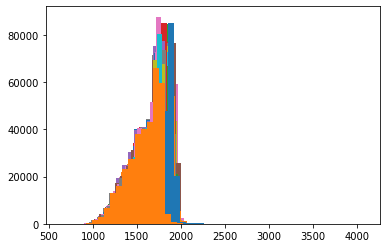

In [ ]:
for i in range(len(imagenames)):
  if imagenames[i].endswith('.TIF'):
    image=imread('/'+local_folder+'/'+ imagesfolder +'/'+imagenames[i])
    plt.hist(image.ravel(),50)

In [ ]:
#get images corresponding to masks, put them in 8 bit and rgb
for imagename in imagenames:
  bright = rescale_intensity(imread(imagesfolder+'/'+imagename),(700,2250))
  #convert to 8 bit from 16 bit
  bright8b= (bright/256).astype('uint8')
  #convert gray to rgb
  brigth8b_rgb=np.stack((bright8b,bright8b,bright8b),axis=2)
  imsave('./imagestraining/'+imagename, brigth8b_rgb)

In [ ]:
!ls

110619_bleb		    110619_bleb.zip  drive	     sample_data
110619_bleb_nuc_memb_masks  adc.json	     imagestraining  training_masks


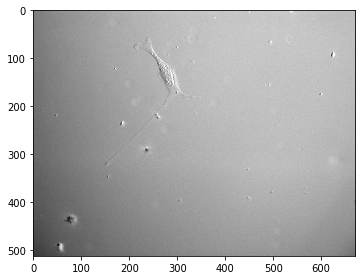

In [ ]:
image=imread('imagestraining/'+imagenames[0])
imshow(image)

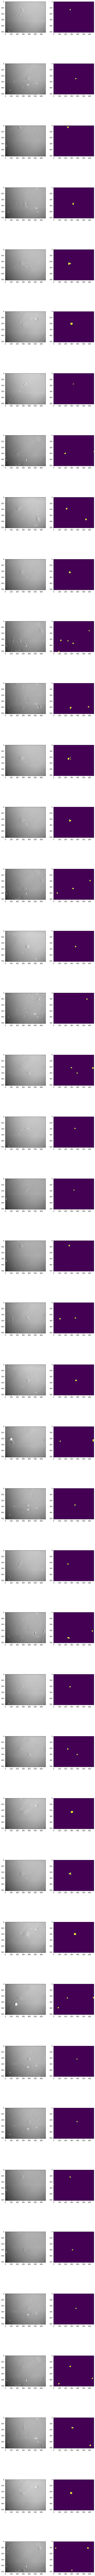

In [ ]:
f, axarr = plt.subplots(len(imagenames),2)
for i in range(len(imagenames)):
  mask=imread(maskdir+'/'+imagenames[i])
  image=imread('imagestraining/'+imagenames[i])

  axarr[i,0].imshow(image)
  axarr[i,1].imshow(mask)    
  f.set_size_inches(10,300)

###Prepare fast.ai data loader

In [ ]:
path=Path('/content')

In [ ]:
#codes = np.loadtxt(path/'codes.txt', dtype=str)

In [ ]:
#codes

In [ ]:
path2 = untar_data(URLs.CAMVID_TINY)

In [ ]:
codes2 = np.loadtxt(path2/'codes.txt', dtype=str)

In [ ]:
codes2

array(['Animal', 'Archway', 'Bicyclist', 'Bridge', 'Building', 'Car',
       'CartLuggagePram', 'Child', 'Column_Pole', 'Fence', 'LaneMkgsDriv',
       'LaneMkgsNonDriv', 'Misc_Text', 'MotorcycleScooter', 'OtherMoving',
       'ParkingBlock', 'Pedestrian', 'Road', 'RoadShoulder', 'Sidewalk',
       'SignSymbol', 'Sky', 'SUVPickupTruck', 'TrafficCone',
       'TrafficLight', 'Train', 'Tree', 'Truck_Bus', 'Tunnel',
       'VegetationMisc', 'Void', 'Wall'], dtype='<U17')

In [ ]:
def label_func(x): return path/maskdir/f'{x.stem}.TIF'
fnames = get_image_files(path/'imagestraining')
codes = np.loadtxt(path2/'codes.txt', dtype=str)

In [ ]:
#dls = SegmentationDataLoaders.from_label_func(
#    path, bs=4, fnames = get_image_files(path/'imagesbrightrgb'),
#    label_func = lambda o: path/'masks'/f'{o.stem}.png',
#    codes = np.loadtxt(path2/'codes.txt', dtype=str)
    
#)

In [ ]:
#dls = SegmentationDataLoaders.from_label_func(path,fnames,label_func,bs=4,codes=codes)

In [ ]:
trainingset = DataBlock(blocks=(ImageBlock, MaskBlock(codes)),
                   get_items = get_image_files,
                   get_y = label_func,
                   splitter=RandomSplitter(),
                   #batch_tfms=aug_transforms(size=(512,672)))
                   batch_tfms=aug_transforms(size=(256,336)))

In [ ]:
dls = trainingset.dataloaders(path/"imagestraining", path=path, bs=8)


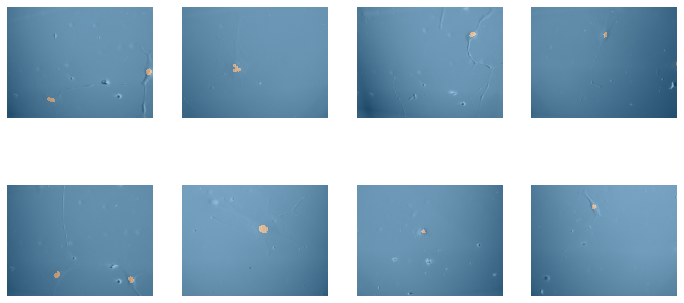

In [ ]:
dls.show_batch(max_n=10)

#Training

In [ ]:
#learn = unet_learner(dls, resnet34)
modelname='seg_nuc_062719_s_1_2_110619_bleb.pkl'
!gsutil cp gs://cellmbucket/fastai_unet_models/{modelname} /{local_folder} 
loadedlearner=load_learner(modelname,cpu=True)
loadedlearner.dls=dls

Copying gs://cellmbucket/fastai_unet_models/seg_nuc_062719_s_1_2_110619_bleb.pkl...
/ [1 files][217.9 MiB/217.9 MiB]                                                
Operation completed over 1 objects/217.9 MiB.                                    


In [ ]:
#learn.fine_tune(8)
loadedlearner.fine_tune(8)


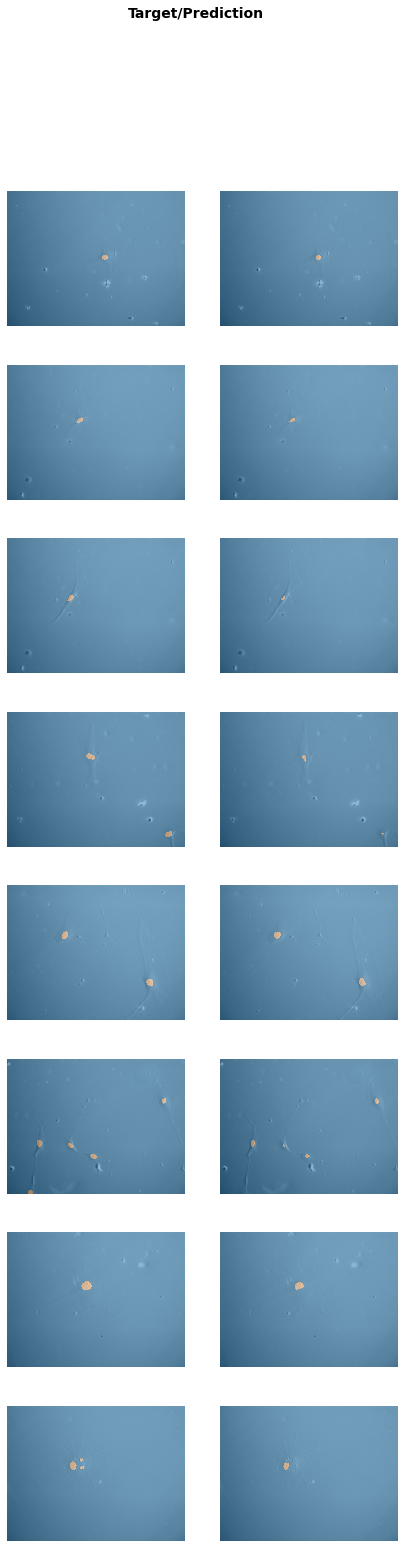

In [ ]:
loadedlearner.show_results(max_n=8, figsize=(7,25))

In [ ]:
loadedlearner.export(fname='seg_nuc_062719_s_1_2_110619_bleb.pkl', pickle_protocol=2)

In [ ]:
!ls

110619_bleb		    imagestraining
110619_bleb_nuc_memb_masks  sample_data
110619_bleb.zip		    seg_cell_062719_s_1_2_110619_bleb.pkl
adc.json		    seg_nuc_062719_s_1_2_110619_bleb.pkl
drive			    training_masks


In [ ]:
!cp /content/seg_nuc_062719_s_1_2_110619_bleb.pkl /content/drive/My\ Drive

# Loading a trained model

In [ ]:
#@markdown local folder is "content" when working in colab, may be different for GCP AI
local_folder='content' #@param

In [ ]:
## ONLY NUCLEUS MODEL

modelname="seg_nuc_062719_s_1_2_110619_bleb.pkl"

!gsutil cp gs://cellmbucket/fastai_unet_models/{modelname} /{local_folder}
 
path=Path('/content')
path2 = untar_data(URLs.CAMVID_TINY)
codes2 = np.loadtxt(path2/'codes.txt', dtype=str)
maskdir='nuclear_masks/'
def label_func(x): return path/maskdir/f'{x.stem}.TIF'
fnames = get_image_files(path/'imagestraining')
codes = np.loadtxt(path2/'codes.txt', dtype=str)
loadedlearner=load_learner(modelname,cpu=True)

Copying gs://cellmbucket/fastai_unet_models/seg_nuc_062719_s_1_2_110619_bleb.pkl...
/ [1 files][217.9 MiB/217.9 MiB]                                                
Operation completed over 1 objects/217.9 MiB.                                    


#Segment experiment

### Set folder names and paths

In [ ]:
#@markdown Path of the folder containing the movies in GCP bucket
movies_path="cellmbucket/06032020-JR20-control/sample1"  #@param {type:"string"}
#@markdown Name of the folder that will contain the masks
foldermasks= '06032020-JR20-control-masks-TRIAL_EMD'  #@param {type:"string"}
#@markdown path of the folder on GCP bucket where the masks will be deposited as a .zip file
dest_path='cellmbucket/06032020-JR20-control-masks-TRIAL_EMD/06032020-JR20-control-sample1-nuc-masks-TRIAL_EMD' #@param {type:"string"}

In [ ]:
folderimages= ntpath.basename(movies_path)

In [ ]:
foldermasks

'06032020-JR20-control-masks-TRIAL_EMD'

In [ ]:
!mkdir {foldermasks}

### Get movies from GCP

In [ ]:
!gsutil -m cp -r gs://{movies_path} /content

Copying gs://cellmbucket/06032020-JR20-control/sample1/10_line.tif...
Copying gs://cellmbucket/06032020-JR20-control/sample1/11_line.tif...
Copying gs://cellmbucket/06032020-JR20-control/sample1/12_line.tif...
Copying gs://cellmbucket/06032020-JR20-control/sample1/16_steepz2.tif...
Copying gs://cellmbucket/06032020-JR20-control/sample1/15_steepz2.tif...
Copying gs://cellmbucket/06032020-JR20-control/sample1/19_steepz2.tif...
Copying gs://cellmbucket/06032020-JR20-control/sample1/18_steepz2.tif...
Copying gs://cellmbucket/06032020-JR20-control/sample1/14_line.tif...
Copying gs://cellmbucket/06032020-JR20-control/sample1/13_line.tif...
Copying gs://cellmbucket/06032020-JR20-control/sample1/17_steepz2.tif...
Copying gs://cellmbucket/06032020-JR20-control/sample1/1_stiff.tif...
Copying gs://cellmbucket/06032020-JR20-control/sample1/20_steepz2.tif...
Copying gs://cellmbucket/06032020-JR20-control/sample1/21_steepz2.tif...
Copying gs://cellmbucket/06032020-JR20-control/sample1/22_steepz2.tif

In [ ]:
!ls

06032020-JR20-control-masks-TRIAL_EMD  sample1
adc.json			       sample_data
drive				       seg_nuc_062719_s_1_2_110619_bleb.pkl


### Format movies saved as tif into individual image files, make a .txt file containing the names of the movies which has the gel region

In [ ]:
names_movies=[f for f in os.listdir(folderimages) if f.endswith('.tif')]

In [ ]:
for name in names_movies:
  movie=imread(folderimages+'/'+name)
  s=re.findall(r"(\d+)_", name)
  for i in range(movie.shape[0]):
    imagename = folderimages + '_s'+s[0]+'_t'+str(i+1)+'.TIF'
    imsave(folderimages + '/' + imagename, movie[i])


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: sample1/sample1_s26_t28.TIF is a low contrast image
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: sample1/sample1_s26_t29.TIF is a low contrast image
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: sample1/sample1_s26_t30.TIF is a low contrast image
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: sample1/sample1_s26_t31.TIF is a low contrast image
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: sample1/sample1_s26_t32.TIF is a low contrast image
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: sample1/sample1_s26_t33.TIF is a low contrast image
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: sample1/sample1_s26_t34.TIF is a low contrast image
  
/usr/local/lib/python3.7/

In [ ]:
with open(foldermasks+'-regions.txt', 'w') as filehandle:
    filehandle.writelines("%s\n" % moviename for moviename in names_movies)

In [ ]:
!gsutil -m cp /content/{foldermasks}-regions.txt gs://{dest_path}  

Copying file:///content/06032020-JR20-control-masks-TRIAL_EMD-regions.txt [Content-Type=text/plain]...
/ [1/1 files][  451.0 B/  451.0 B] 100% Done                                    
Operation completed over 1 objects/451.0 B.                                      


### Get number of movies and frames per movie, find image basename

In [ ]:
imagenames=[f for f in os.listdir(folderimages) if f.endswith('.TIF')]

In [ ]:
imagenames[0]

'sample1_s5_t68.TIF'

In [ ]:
#Get movie numbers and show the largest number
listmovies=[int(re.findall(r"s(\d+).", imagenames[i])[0]) for i in range(len(imagenames)) ]
nmovies=max(listmovies)
movies=set(listmovies)
movies

{1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34}

In [ ]:
#Get frame numbers and show the largest number
listframes=[int(re.findall(r"t(\d+).", imagenames[i])[0]) for i in range(len(imagenames)) ]
nframes=max(listframes)
frames=range(1,nframes+1)
nframes

133

In [ ]:
re.findall(r"(.*)_s",imagenames[0])[0]

'sample1'

In [ ]:
filenamebase='sample1' #@param {type:"string"}

### Set contrast range

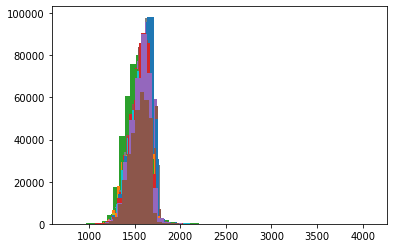

In [ ]:
imagenames=os.listdir(folderimages)
for i in range(1,len(imagenames),100):
  if imagenames[i][-3:]=='TIF':
    image=imread(folderimages + '/'+imagenames[i])
    plt.hist(image.ravel(),50)

In [ ]:
minpixelintensity=1000 #@param {type:"integer"}
maxpixelintensity=2100 #@param {type:"integer"}

###Test segmentation

In [ ]:
for movie in range(1,4):
  for i in range(1,4):
    bright = rescale_intensity(imread(folderimages+'/'+filenamebase+'_s'+str(movie)+'_t'+str(i)+'.TIF'),(minpixelintensity,maxpixelintensity))
    #convert to 8 bit from 16 bit
    bright8b= (bright/256).astype('uint8')
    tosegment=np.stack((bright8b,bright8b,bright8b),axis=2)
    segmented = loadedlearner.predict(tosegment)[1]
    mask01=np.asarray(segmented)
    imsave(foldermasks+'/'+filenamebase+'_s'+str(movie)+'_t'+str(i)+'.TIF', mask01.astype('uint8'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: 06032020-JR20-control-masks-TRIAL_EMD/sample1_s1_t1.TIF is a low contrast image
  if __name__ == '__main__':


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: 06032020-JR20-control-masks-TRIAL_EMD/sample1_s1_t2.TIF is a low contrast image
  if __name__ == '__main__':


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: 06032020-JR20-control-masks-TRIAL_EMD/sample1_s1_t3.TIF is a low contrast image
  if __name__ == '__main__':


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: 06032020-JR20-control-masks-TRIAL_EMD/sample1_s2_t1.TIF is a low contrast image
  if __name__ == '__main__':


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: 06032020-JR20-control-masks-TRIAL_EMD/sample1_s2_t2.TIF is a low contrast image
  if __name__ == '__main__':


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: 06032020-JR20-control-masks-TRIAL_EMD/sample1_s2_t3.TIF is a low contrast image
  if __name__ == '__main__':


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: 06032020-JR20-control-masks-TRIAL_EMD/sample1_s3_t1.TIF is a low contrast image
  if __name__ == '__main__':


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: 06032020-JR20-control-masks-TRIAL_EMD/sample1_s3_t2.TIF is a low contrast image
  if __name__ == '__main__':


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: 06032020-JR20-control-masks-TRIAL_EMD/sample1_s3_t3.TIF is a low contrast image
  if __name__ == '__main__':


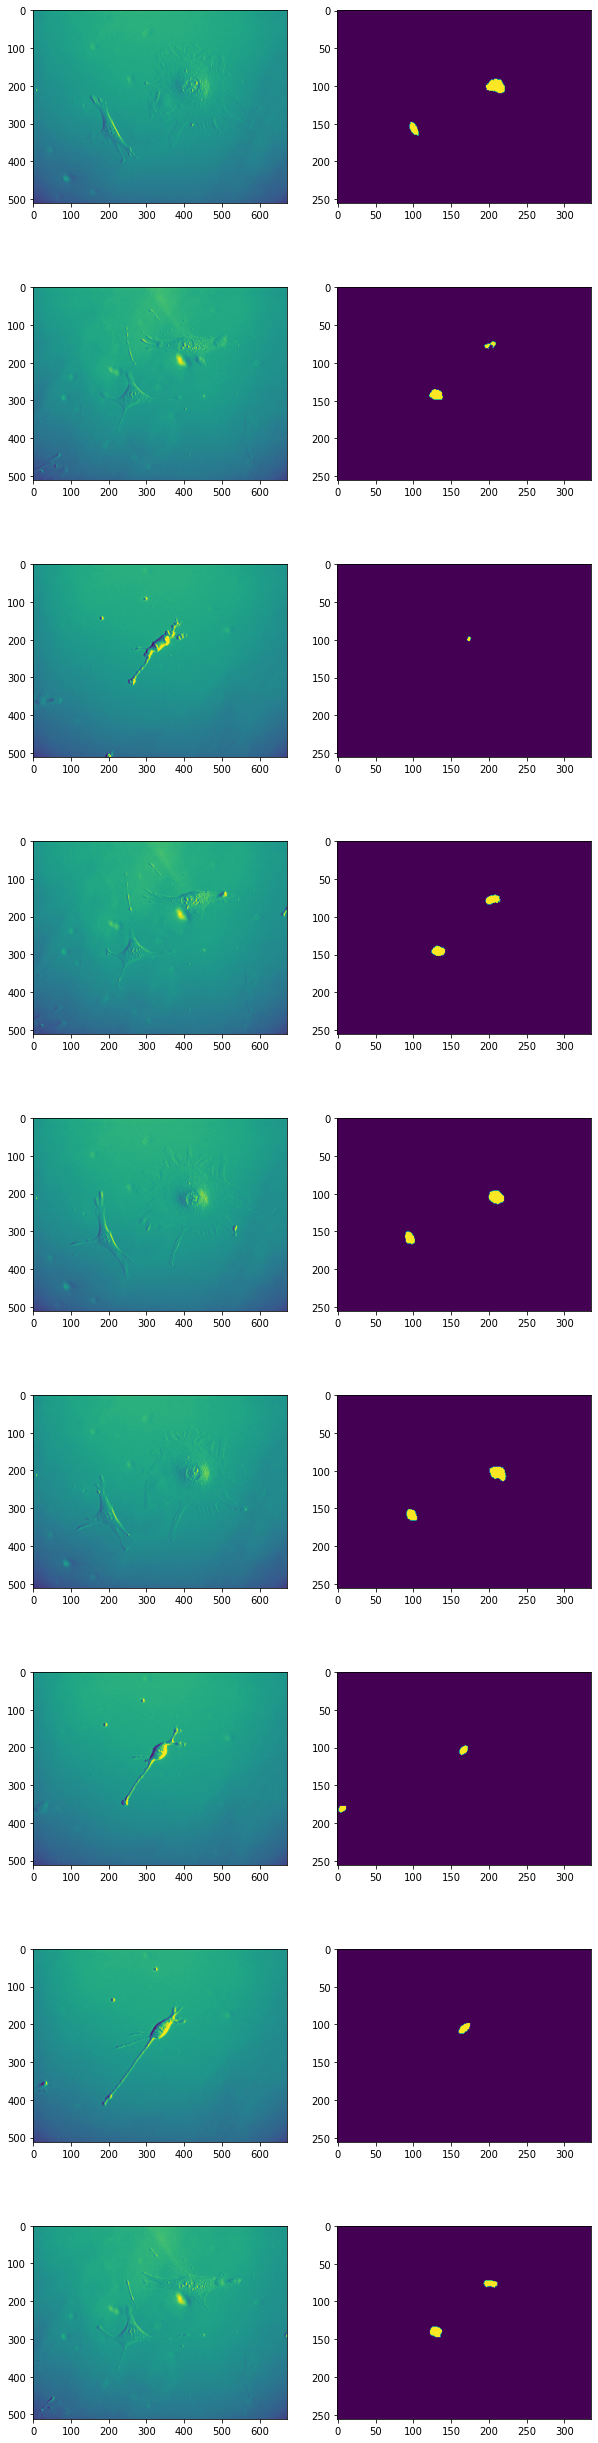

In [ ]:
masknames=os.listdir(foldermasks)
nimages=len(masknames)
f, axarr = plt.subplots(nimages,2)

for i in range(nimages):
  mask=imread(foldermasks+'/'+masknames[i])
  image=rescale_intensity(imread(folderimages+'/'+masknames[i]),(minpixelintensity,maxpixelintensity))

  axarr[i,0].imshow(image)
  axarr[i,1].imshow(mask)    
  f.set_size_inches(10,5*nimages)

###Segment experiment and save output

In [ ]:
for movie in movies:
  for i in frames:
    bright = rescale_intensity(imread(folderimages+'/'+filenamebase+'_s'+str(movie)+'_t'+str(i)+'.TIF'),(minpixelintensity,maxpixelintensity))
    #convert to 8 bit from 16 bit
    bright8b= (bright/256).astype('uint8')
    tosegment=np.stack((bright8b,bright8b,bright8b),axis=2)
    segmented = loadedlearner.predict(tosegment)[1]
    mask01=np.asarray(segmented)
    imsave(foldermasks+'/'+filenamebase+'_s'+str(movie)+'_t'+str(i)+'.TIF', mask01.astype('uint8'))

In [ ]:
!zip -r {foldermasks}.zip {foldermasks}

  adding: 06032020-JR20-control-masks-TRIAL_EMD/ (stored 0%)
  adding: 06032020-JR20-control-masks-TRIAL_EMD/sample1_s5_t68.TIF (deflated 99%)
  adding: 06032020-JR20-control-masks-TRIAL_EMD/sample1_s6_t106.TIF (deflated 99%)
  adding: 06032020-JR20-control-masks-TRIAL_EMD/sample1_s19_t48.TIF (deflated 100%)
  adding: 06032020-JR20-control-masks-TRIAL_EMD/sample1_s15_t67.TIF (deflated 100%)
  adding: 06032020-JR20-control-masks-TRIAL_EMD/sample1_s34_t17.TIF (deflated 100%)
  adding: 06032020-JR20-control-masks-TRIAL_EMD/sample1_s13_t58.TIF (deflated 100%)
  adding: 06032020-JR20-control-masks-TRIAL_EMD/sample1_s17_t100.TIF (deflated 100%)
  adding: 06032020-JR20-control-masks-TRIAL_EMD/sample1_s28_t104.TIF (deflated 100%)
  adding: 06032020-JR20-control-masks-TRIAL_EMD/sample1_s21_t105.TIF (deflated 100%)
  adding: 06032020-JR20-control-masks-TRIAL_EMD/sample1_s30_t68.TIF (deflated 100%)
  adding: 06032020-JR20-control-masks-TRIAL_EMD/sample1_s16_t63.TIF (deflated 100%)
  adding: 06032

In [ ]:
!gsutil -m cp /content/{foldermasks}.zip gs://{dest_path}  

Copying file:///content/06032020-JR20-control-masks-TRIAL_EMD.zip [Content-Type=application/zip]...
-
Operation completed over 1 objects/2.5 MiB.                                      
